## Analysis with AQ Score
- AQ Score X OPI (pearson correlation and plot)
- AQ Score X TWI (pearson correlation and plot)
- AQ Score X HL (pearson correlation and plot)
- AQ Score X LDL (pearson correlation and plot)
- TWI - group difference according to matching autism questionnaire criteria for autism evaluation and not (t test and plot)
- OPI -  group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- LDL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- HL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit

pd.options.mode.chained_assignment = None  # Stop seeing warnings

df = pd.read_pickle("data/df")
#df_sigmoid = pd.read_pickle("data/df_sigmoid")
df_sigmoid = pd.read_pickle("data/df_group_sigmoid_aq")

In [2]:
df.describe()

,Age,AQ_TOTAL,TWI,OPI,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,...,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL
count,30.000000,30.000000,18.000000,20.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,17.566667,4.700000,149.261258,0.316333,68.437500,74.479167,79.791667,76.458333,72.916667,66.770833,...,7.500000,7.291667,6.250000,4.791667,3.333333,2.291667,73.142361,6.562500,6.284722,5.243056
std,1.135124,1.704962,35.102264,0.210646,20.078819,24.249374,23.427927,27.592893,31.473476,30.310702,...,6.756639,6.912366,7.109394,4.995469,5.646597,8.843957,25.209562,5.551214,4.809029,5.157420
min,16.000000,1.000000,100.299235,0.000000,35.000000,35.000000,35.000000,35.000000,20.000000,20.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-10.000000,36.666667,-1.666667,-0.833333,-1.666667
25%,17.000000,4.000000,124.602969,0.145000,50.000000,58.750000,63.750000,50.000000,45.000000,35.000000,...,5.000000,3.750000,0.000000,0.000000,0.000000,-1.250000,50.416667,1.250000,2.291667,0.000000
50%,17.500000,5.000000,145.567253,0.313333,72.500000,75.000000,82.500000,82.500000,77.500000,72.500000,...,7.500000,5.000000,5.000000,5.000000,2.500000,0.000000,75.416667,7.083333,5.833333,5.000000
75%,18.000000,6.000000,169.447549,0.476667,80.000000,100.000000,95.000000,98.125000,100.000000,95.625000,...,10.000000,11.250000,10.000000,10.000000,5.000000,6.250000,94.479167,11.041667,8.541667,8.333333
max,21.000000,8.000000,228.092143,0.693333,100.000000,110.000000,120.000000,120.000000,115.000000,100.000000,...,25.000000,25.000000,25.000000,15.000000,15.000000,20.000000,106.666667,17.500000,18.333333,18.333333


<Axes: xlabel='AQ_TOTAL', ylabel='Count'>

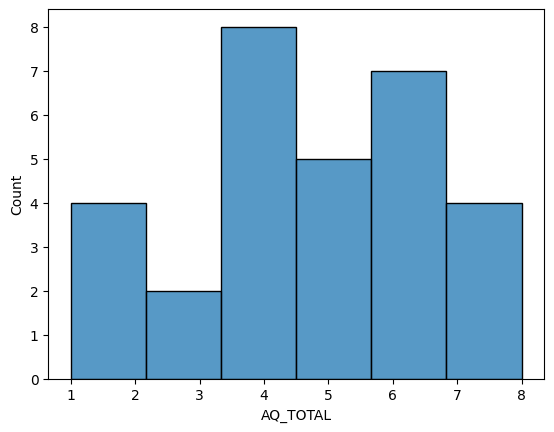

In [3]:
sns.histplot(data=df, x="AQ_TOTAL")

In [4]:
'''

pg.cronbach_alpha(
    df[
        [
            "AQ_1",
            "AQ_2",
            "AQ_3",
            "AQ_4",
            "AQ_5",
            "AQ_6",
            "AQ_7",
            "AQ_8",
            "AQ_9",
            "AQ_10",
        ]
    ]
)
'''

'\n\npg.cronbach_alpha(\n    df[\n        [\n            "AQ_1",\n            "AQ_2",\n            "AQ_3",\n            "AQ_4",\n            "AQ_5",\n            "AQ_6",\n            "AQ_7",\n            "AQ_8",\n            "AQ_9",\n            "AQ_10",\n        ]\n    ]\n)\n'

In [5]:
df.groupby("AQ_MC").describe()["AQ_TOTAL"]

,count,mean,std,min,25%,50%,75%,max
AQ_MC,,,,,,,,
False,19.0,3.684211,1.204281,1.0,3.0,4.0,4.5,5.0
True,11.0,6.454545,0.687552,6.0,6.0,6.0,7.0,8.0


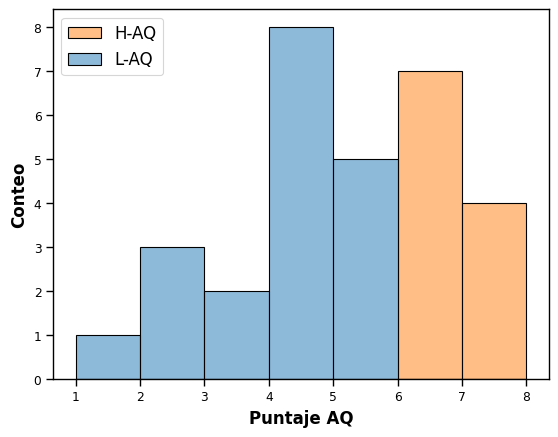

In [6]:
sns.set_context("paper")
ax = sns.histplot(
    data=df, x="AQ_TOTAL", hue="AQ_MC", stat="count", kde=False, binwidth=1
)
# ax.set_ylabel("Count", fontdict={"weight": "bold", "size": 12})
# ax.set_xlabel("AQ Score", fontdict={"weight": "bold", "size": 12})
ax.set_ylabel("Conteo", fontdict={"weight": "bold", "size": 12})
ax.set_xlabel("Puntaje AQ", fontdict={"weight": "bold", "size": 12})
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels=["H-AQ", "L-AQ"], fontsize=12)
plt.savefig("drafts/FIG1.pdf", bbox_inches="tight", format="pdf")

In [7]:
df.groupby(["AQ_MC", "Sex"]).count()

Código de participante  Group  Age  EL  Occupation  \
AQ_MC Sex                                                             
False Femenino                       15     15   15  15          15   
      Masculino                       4      4    4   4           4   
True  Femenino                        9      9    9   9           9   
      Masculino                       2      2    2   2           2   

                 Scholarship  Neurological_D  Conditions  Prob_Vision  \
AQ_MC Sex                                                               
False Femenino            10              15          15           15   
      Masculino            0               4           4            4   
True  Femenino             3               9           9            9   
      Masculino            1               2           2            2   

                 Prob_Aud  ...  HL_250  HL_500  HL_1000  HL_2000  HL_4000  \
AQ_MC Sex                  ...                                              
False Femenino         15  ...      12      12       12       12       12   
      Masculino         4  ...       4       4        4        4        4   
True  Femenino          9  ...       7       7        7        7        7   
      Masculino         2  ...       1       1        1        1        1   

                 HL_8000  Avg_LDL  Avg_HL_L  Avg_HL_R  Avg_HL  
AQ_MC Sex                                                      
False Femenino        12       12        12        12      12  
      Masculino        4        4         4         4       4  
True  Femenino         7        7         7         7       7  
      Masculino        1        1         1         1       1  

[4 rows x 47 columns]

### AQ X OPI, AQ X TWI

In [8]:
pg.pairwise_corr(data=df, columns=[["AQ_TOTAL"], ["TWI", "OPI"]], method="pearson")

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,AQ_TOTAL,TWI,pearson,two-sided,18,-0.068033,"[-0.52, 0.41]",0.788522,0.301,0.057602
1,AQ_TOTAL,OPI,pearson,two-sided,20,-0.588147,"[-0.82, -0.2]",0.006380,8.905,0.810534


In [9]:
'''
aq_dfi_corr = pg.pairwise_corr(
    data=df,
    columns=[
        [
            "AQ_Attention_Detail",
            "AQ_Attention_Switch",
            "AQ_Communication",
            "AQ_Imagination",
            "AQ_Social",
        ],
        ["TWI", "OPI"],
    ],
    method="pearson",
)
sup_table_2 = aq_dfi_corr[["X", "Y", "r", "p-unc"]]
pg.print_table(sup_table_2, tablefmt="latex")
'''

'\naq_dfi_corr = pg.pairwise_corr(\n    data=df,\n    columns=[\n        [\n            "AQ_Attention_Detail",\n            "AQ_Attention_Switch",\n            "AQ_Communication",\n            "AQ_Imagination",\n            "AQ_Social",\n        ],\n        ["TWI", "OPI"],\n    ],\n    method="pearson",\n)\nsup_table_2 = aq_dfi_corr[["X", "Y", "r", "p-unc"]]\npg.print_table(sup_table_2, tablefmt="latex")\n'

In [10]:
'''
pg.normality(
    df[
        [
            "TWI",
            "OPI",
            "AQ_TOTAL",
            "AQ_Attention_Detail",
            "AQ_Attention_Switch",
            "AQ_Communication",
            "AQ_Imagination",
            "AQ_Social",
        ]
    ]
)
'''

'\npg.normality(\n    df[\n        [\n            "TWI",\n            "OPI",\n            "AQ_TOTAL",\n            "AQ_Attention_Detail",\n            "AQ_Attention_Switch",\n            "AQ_Communication",\n            "AQ_Imagination",\n            "AQ_Social",\n        ]\n    ]\n)\n'

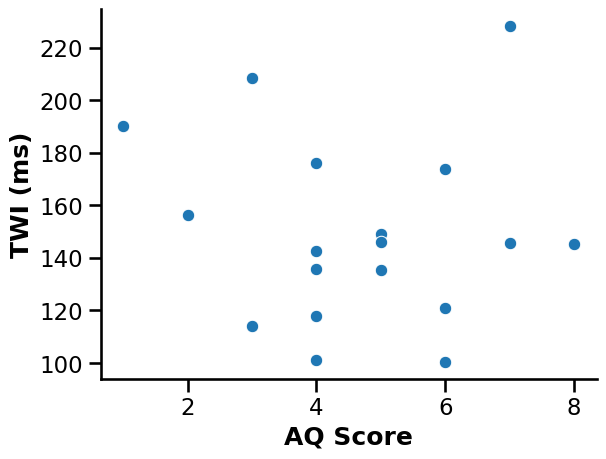

In [11]:
sns.set_context("talk")
sns.axes_style({"font.sans-serif": "Computer Modern Sans Serif"})

fig = sns.scatterplot(data=df, x="AQ_TOTAL", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})

plt.show()

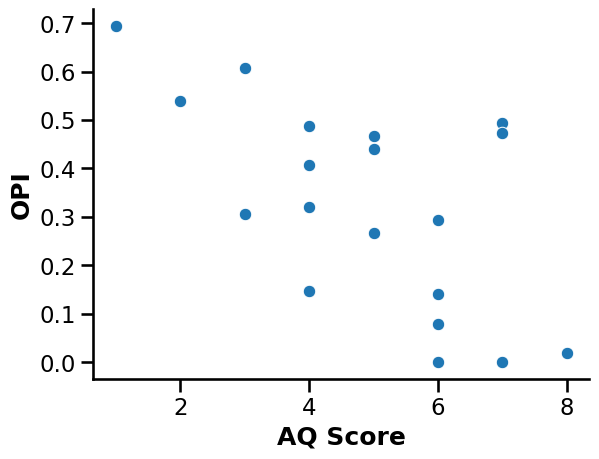

In [12]:
sns.set_context("talk")
fig = sns.scatterplot(data=df, x="AQ_TOTAL", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
plt.show()

In [13]:
## TODO Create plot with this two graphs.

### AQ X LDL

In [14]:
pg.normality(
    df[
        [
            "AQ_TOTAL",
            "Avg_LDL",
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ]
    ]
)

,W,pval,normal
AQ_TOTAL,0.957307,0.263953,True
Avg_LDL,0.902327,0.024120,False
LDL_250,0.936714,0.137766,True
LDL_500,0.904978,0.027483,False
LDL_1000,0.976486,0.823374,True
LDL_2000,0.929095,0.093053,True
LDL_4000,0.926578,0.081762,True
LDL_8000,0.861714,0.003635,False


In [15]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["AQ_TOTAL"],
        [
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ],
    ],
    method="kendall",
    padjust="bonferroni",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,AQ_TOTAL,LDL_250,kendall,two-sided,24,0.364565,"[-0.05, 0.67]",0.022917,0.137503,bonferroni,0.429498
1,AQ_TOTAL,LDL_500,kendall,two-sided,24,0.431540,"[0.03, 0.71]",0.006859,0.041151,bonferroni,0.576846
2,AQ_TOTAL,LDL_1000,kendall,two-sided,24,0.493011,"[0.11, 0.75]",0.001680,0.010081,bonferroni,0.711738
3,AQ_TOTAL,LDL_2000,kendall,two-sided,24,0.482282,"[0.1, 0.74]",0.002015,0.012092,bonferroni,0.688959
4,AQ_TOTAL,LDL_4000,kendall,two-sided,24,0.405798,"[0.0, 0.7]",0.009273,0.055640,bonferroni,0.519243
5,AQ_TOTAL,LDL_8000,kendall,two-sided,24,0.421637,"[0.02, 0.71]",0.007680,0.046081,bonferroni,0.554635


In [16]:
'''
aq_ldl_corr = pg.pairwise_corr(
    data=df,
    columns=[
        [
            "AQ_Attention_Detail",
            "AQ_Attention_Switch",
            "AQ_Communication",
            "AQ_Imagination",
            "AQ_Social",
        ],
        [
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ],
    ],
    method="kendall",
    # padjust="bonferroni",
)

sup_table_3 = aq_ldl_corr[["X", "Y", "r", "p-unc"]]
pg.print_table(sup_table_3, tablefmt="latex")
'''

'\naq_ldl_corr = pg.pairwise_corr(\n    data=df,\n    columns=[\n        [\n            "AQ_Attention_Detail",\n            "AQ_Attention_Switch",\n            "AQ_Communication",\n            "AQ_Imagination",\n            "AQ_Social",\n        ],\n        [\n            "LDL_250",\n            "LDL_500",\n            "LDL_1000",\n            "LDL_2000",\n            "LDL_4000",\n            "LDL_8000",\n        ],\n    ],\n    method="kendall",\n    # padjust="bonferroni",\n)\n\nsup_table_3 = aq_ldl_corr[["X", "Y", "r", "p-unc"]]\npg.print_table(sup_table_3, tablefmt="latex")\n'

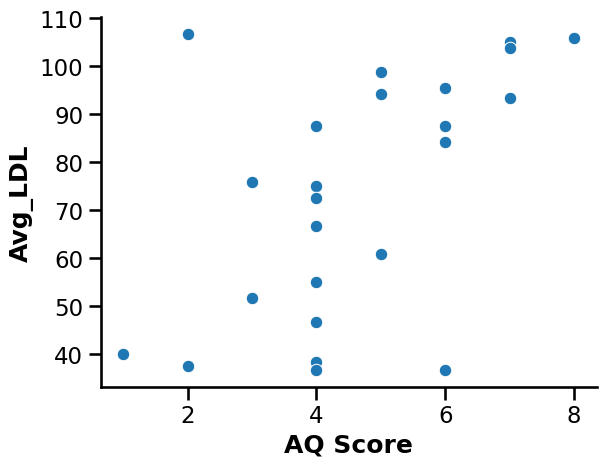

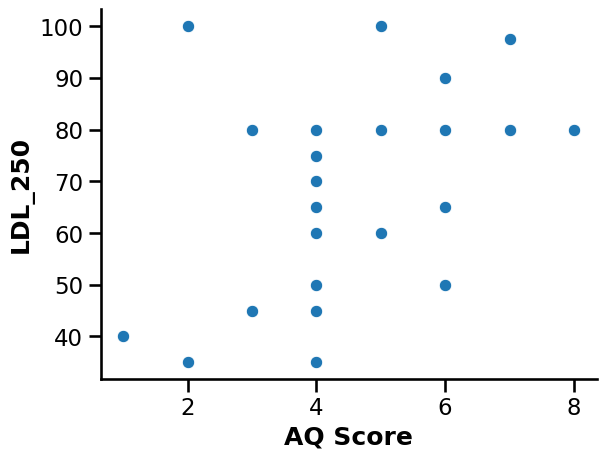

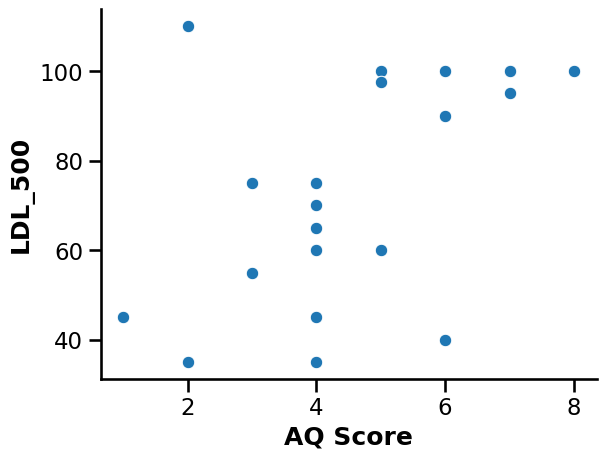

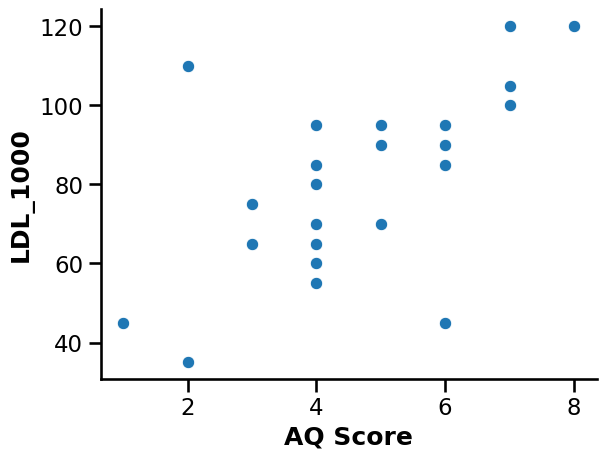

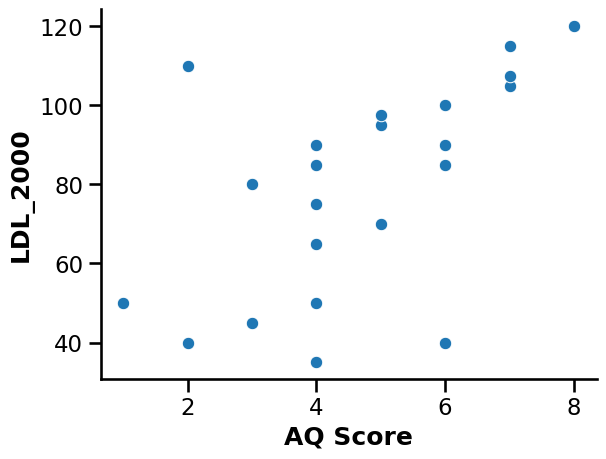

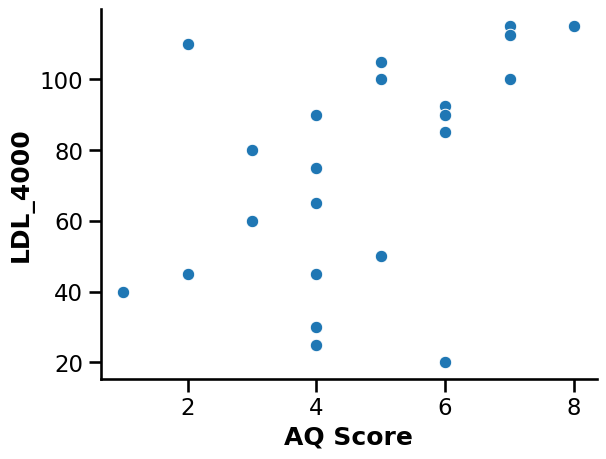

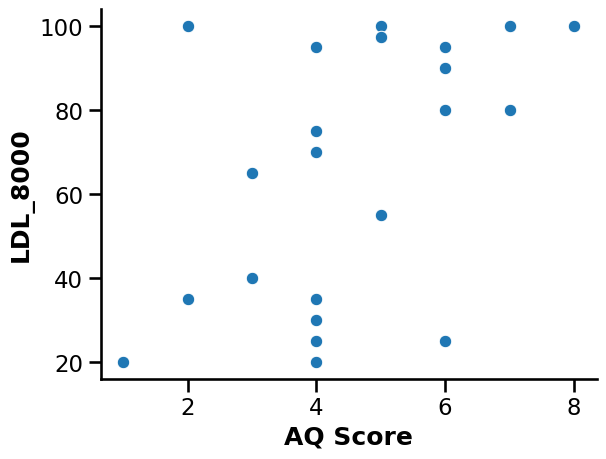

In [17]:
freqs = [
    "Avg_LDL",
    "LDL_250",
    "LDL_500",
    "LDL_1000",
    "LDL_2000",
    "LDL_4000",
    "LDL_8000",
]

for frequency in freqs:
    sns.set_context("talk")
    fig = sns.scatterplot(data=df, x="AQ_TOTAL", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
    plt.show()

In [18]:
## TODO Create plot with all these graphs

In [19]:
pg.pairwise_corr(
    data=df,
    columns=[
        [
            "HL_250",
            "HL_500",
            "HL_1000",
            "HL_2000",
            "HL_4000",
            "HL_8000",
        ],
        [
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ],
    ],
    method="kendall",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,HL_250,LDL_250,kendall,two-sided,24,0.354222,"[-0.06, 0.66]",0.031818,0.407860
1,HL_250,LDL_500,kendall,two-sided,24,0.303688,"[-0.11, 0.63]",0.064607,0.309493
2,HL_250,LDL_1000,kendall,two-sided,24,0.245402,"[-0.18, 0.59]",0.128740,0.214758
3,HL_250,LDL_2000,kendall,two-sided,24,0.273481,"[-0.15, 0.61]",0.088925,0.257669
4,HL_250,LDL_4000,kendall,two-sided,24,0.268775,"[-0.15, 0.61]",0.094104,0.250115
5,HL_250,LDL_8000,kendall,two-sided,24,0.333809,"[-0.08, 0.65]",0.040358,0.366539
6,HL_500,LDL_250,kendall,two-sided,24,0.289223,"[-0.13, 0.62]",0.076520,0.283967
7,HL_500,LDL_500,kendall,two-sided,24,0.206757,"[-0.21, 0.56]",0.203597,0.164296
8,HL_500,LDL_1000,kendall,two-sided,24,0.226332,"[-0.19, 0.58]",0.156862,0.188607
9,HL_500,LDL_2000,kendall,two-sided,24,0.225066,"[-0.2, 0.58]",0.157193,0.186958


### AQ X HL

In [20]:
pg.normality(
    df[
        [
            "AQ_TOTAL",
            "Avg_HL",
            "HL_250",
            "HL_500",
            "HL_1000",
            "HL_2000",
            "HL_4000",
            "HL_8000",
        ]
    ]
)

,W,pval,normal
AQ_TOTAL,0.957307,0.263953,True
Avg_HL,0.945024,0.210872,True
HL_250,0.907258,0.030768,False
HL_500,0.926514,0.081491,True
HL_1000,0.902279,0.024063,False
HL_2000,0.913749,0.042565,False
HL_4000,0.902583,0.024425,False
HL_8000,0.925178,0.076094,True


In [21]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["AQ_TOTAL"],
        ["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
    ],
    method="kendall",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,AQ_TOTAL,HL_250,kendall,two-sided,24,0.175933,"[-0.24, 0.54]",0.296498,0.131149
1,AQ_TOTAL,HL_500,kendall,two-sided,24,0.223762,"[-0.2, 0.58]",0.179640,0.185269
2,AQ_TOTAL,HL_1000,kendall,two-sided,24,0.105538,"[-0.31, 0.49]",0.527245,0.077779
3,AQ_TOTAL,HL_2000,kendall,two-sided,24,0.246552,"[-0.17, 0.59]",0.146759,0.216414
4,AQ_TOTAL,HL_4000,kendall,two-sided,24,0.089795,"[-0.33, 0.48]",0.594234,0.069809
5,AQ_TOTAL,HL_8000,kendall,two-sided,24,-0.124734,"[-0.5, 0.29]",0.449061,0.089395


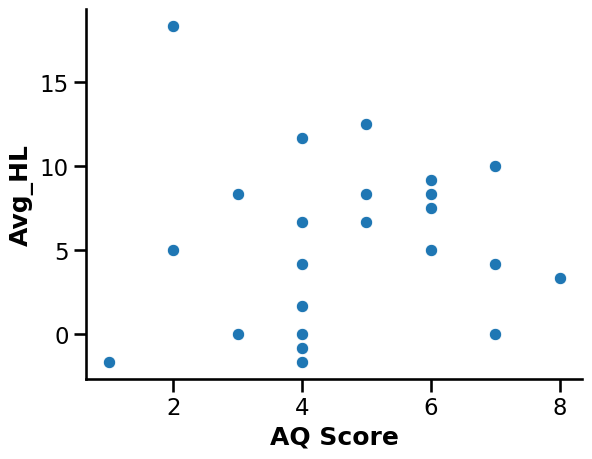

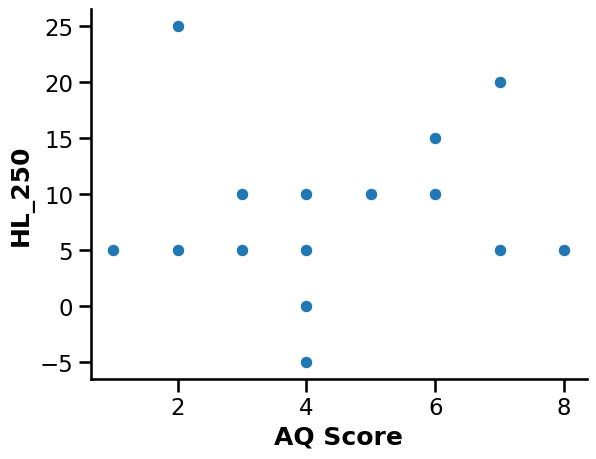

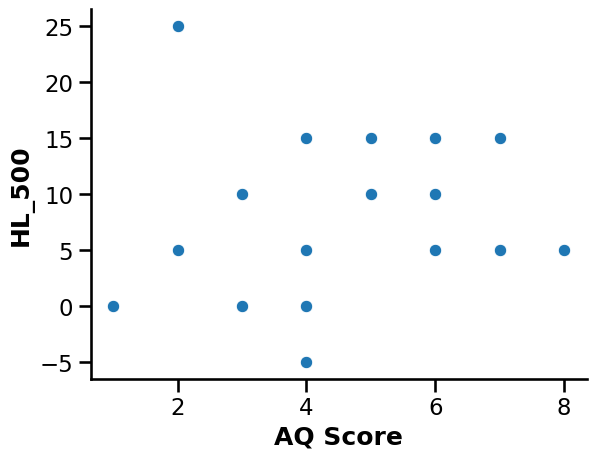

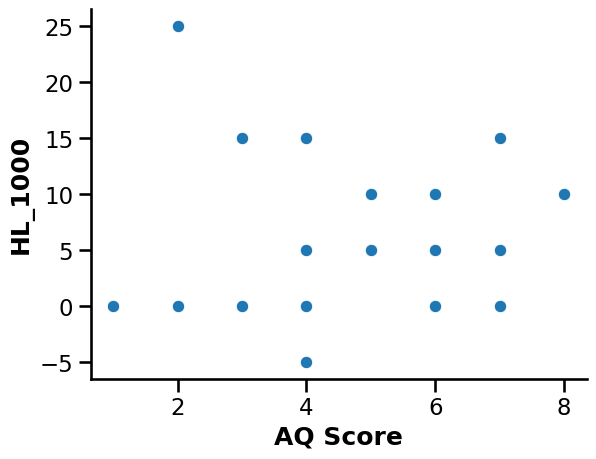

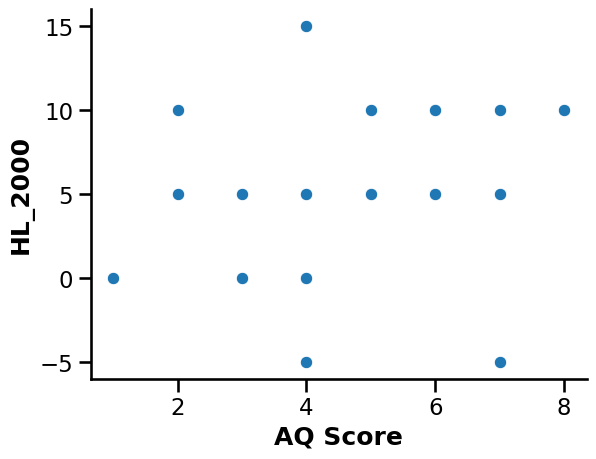

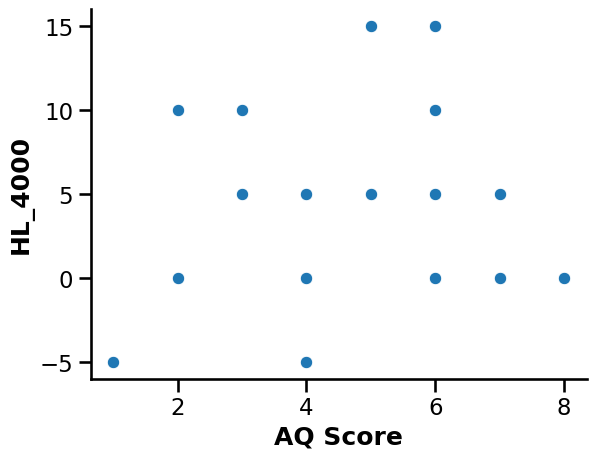

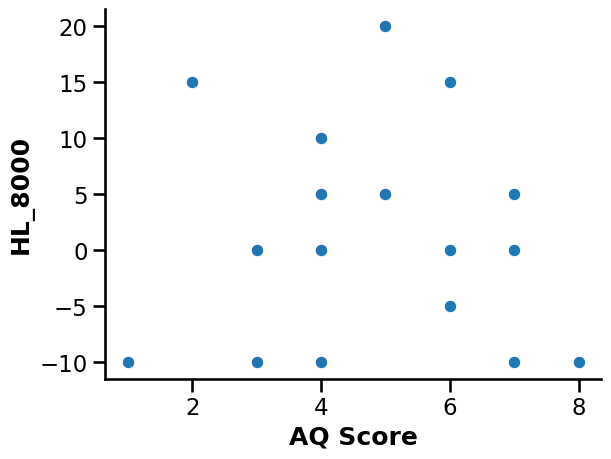

In [22]:
freqs = ["Avg_HL", "HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"]

for frequency in freqs:
    sns.set_context("talk")
    fig = sns.scatterplot(data=df, x="AQ_TOTAL", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
    plt.show()

### Group differences (autism criteria vs no autism criteria) and TWI and OPI

In [23]:
pg.normality(data=df, dv="OPI", group="AQ_MC")

,W,pval,normal
AQ_MC,,,
False,0.968807,0.897909,True
True,0.835406,0.067544,True


In [24]:
pg.pairwise_tests(
    data=df,
    dv="OPI",
    between="AQ_MC",
    effsize="cohen",
    correction=True,
    parametric=True,
    alternative="two-sided",
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,2.434299,13.140138,two-sided,0.02991,2.668,1.155321


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_66502/1083867864.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


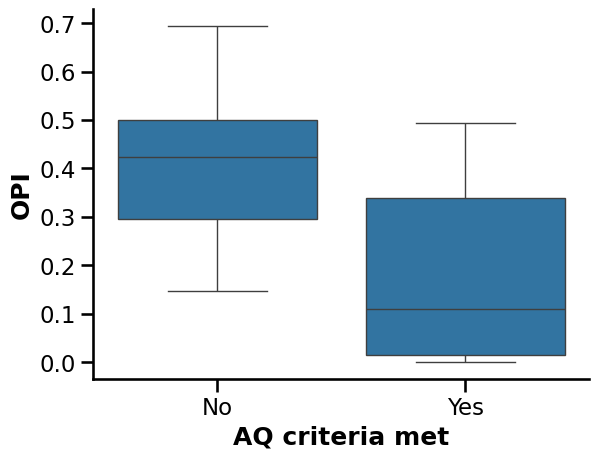

In [25]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

plt.show()

In [26]:
pg.normality(data=df, dv="TWI", group="AQ_MC")

,W,pval,normal
AQ_MC,,,
False,0.962450,0.818159,True
True,0.943275,0.685679,True


In [27]:
pg.pairwise_tests(
    data=df,
    dv="TWI",
    between="AQ_MC",
    effsize="cohen",
    correction=True,
    parametric=True,
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-0.231174,7.57411,two-sided,0.823301,0.435,-0.130434


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_66502/3320831477.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


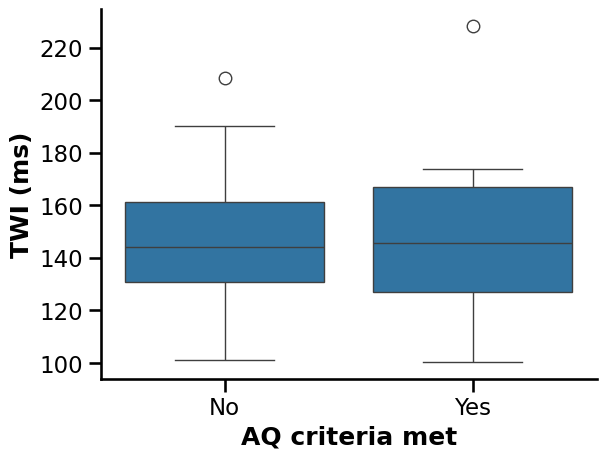

In [28]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})
fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

plt.show()

### Group differences (autism criteria vs no autism criteria) and HL mean and LDL mean per frequency

#### LDL

In [29]:
df_pointplots = df[
    [
        "Código de participante",
        "AQ_MC",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
    ]
]

# Split groups
df_pointplots_AQ = df_pointplots[df_pointplots["AQ_MC"] == True]
df_pointplots_control = df_pointplots[df_pointplots["AQ_MC"] == False]

# Melt for HA
df_pointplots_AQ = pd.melt(
    df_pointplots_AQ,
    id_vars=["Código de participante"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_AQ["Group"] = "H-AQ"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_control["Group"] = "L-AQ"

# Concat
df_pointplots_ldl = pd.concat([df_pointplots_AQ, df_pointplots_control])

# Rename columns
df_pointplots_ldl.dropna(inplace=True)
df_pointplots_ldl.columns = ["ID", "Freq", "Db", "Group"]

df_pointplots_ldl

,ID,Freq,Db,Group
0,AC02,LDL_250,80.0,H-AQ
1,AC05,LDL_250,80.0,H-AQ
2,AC06,LDL_250,80.0,H-AQ
3,AC10,LDL_250,90.0,H-AQ
4,AC11,LDL_250,65.0,H-AQ
...,...,...,...,...
109,GC001,LDL_8000,20.0,L-AQ
110,GC006,LDL_8000,35.0,L-AQ
111,GC007,LDL_8000,75.0,L-AQ
112,GC008,LDL_8000,20.0,L-AQ


In [30]:
df_pointplots_ldl

,ID,Freq,Db,Group
0,AC02,LDL_250,80.0,H-AQ
1,AC05,LDL_250,80.0,H-AQ
2,AC06,LDL_250,80.0,H-AQ
3,AC10,LDL_250,90.0,H-AQ
4,AC11,LDL_250,65.0,H-AQ
...,...,...,...,...
109,GC001,LDL_8000,20.0,L-AQ
110,GC006,LDL_8000,35.0,L-AQ
111,GC007,LDL_8000,75.0,L-AQ
112,GC008,LDL_8000,20.0,L-AQ


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_66502/2078210927.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


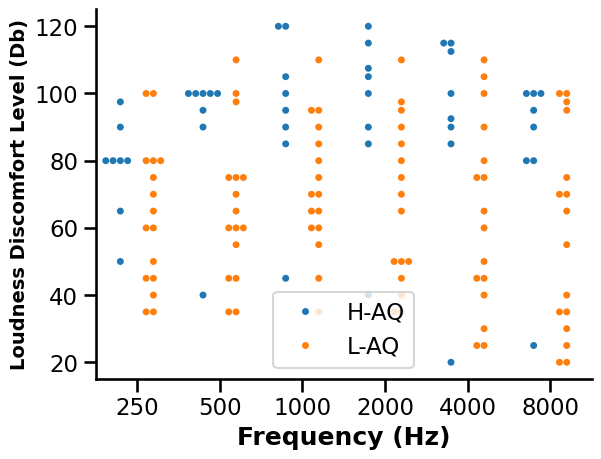

In [31]:
import starbars

fig = sns.swarmplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    #    linestyles=["-", "--"],
    #    errorbar="se",
    dodge=True,
)

fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "size": 14}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

In [32]:
pg.normality(data=df_pointplots_ldl, dv="Db", group="Freq")

,W,pval,normal
Freq,,,
LDL_250,0.936714,0.137766,True
LDL_500,0.904978,0.027483,False
LDL_1000,0.976486,0.823374,True
LDL_2000,0.929095,0.093053,True
LDL_4000,0.926578,0.081762,True
LDL_8000,0.861714,0.003635,False


In [33]:
pg.mixed_anova(
    data=df_pointplots_ldl, dv="Db", between="Group", within="Freq", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,18010.438368,1,22,18010.438368,5.685472,0.026157,NaN,0.205359,NaN,NaN,NaN,NaN
1,Freq,2874.696181,5,110,574.939236,7.494637,0.000004,0.000241,0.254102,0.61345,False,0.23805,0.007279
2,Interaction,706.618924,5,110,141.323785,1.842230,0.110471,NaN,0.077268,NaN,NaN,NaN,NaN


In [34]:
ldl_posthoc = pg.pairwise_tests(
    data=df_pointplots_ldl,
    dv="Db",
    between="Group",
    within="Freq",
    subject="ID",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)
ldl_posthoc

/Users/camilamaura/Coding projects/GIFTED-DFI/.venv/lib/python3.12/site-packages/pingouin/pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)


,Contrast,Freq,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Freq,-,LDL_1000,LDL_2000,True,True,1.591717,23.000000,two-sided,0.125100,1.000000,bonferroni,0.646,0.130232
1,Freq,-,LDL_1000,LDL_250,True,True,4.485311,23.000000,two-sided,0.000168,0.002519,bonferroni,170.173,0.520410
2,Freq,-,LDL_1000,LDL_4000,True,True,2.336757,23.000000,two-sided,0.028525,0.427881,bonferroni,2.037,0.247802
3,Freq,-,LDL_1000,LDL_500,True,True,2.482002,23.000000,two-sided,0.020803,0.312040,bonferroni,2.636,0.222819
4,Freq,-,LDL_1000,LDL_8000,True,True,4.065502,23.000000,two-sided,0.000478,0.007171,bonferroni,67.154,0.480672
5,Freq,-,LDL_2000,LDL_250,True,True,3.003261,23.000000,two-sided,0.006342,0.095124,bonferroni,7.113,0.332399
6,Freq,-,LDL_2000,LDL_4000,True,True,1.968706,23.000000,two-sided,0.061153,0.917289,bonferroni,1.111,0.119664
7,Freq,-,LDL_2000,LDL_500,True,True,0.901215,23.000000,two-sided,0.376815,1.000000,bonferroni,0.309,0.076195
8,Freq,-,LDL_2000,LDL_8000,True,True,4.571421,23.000000,two-sided,0.000135,0.002032,bonferroni,206.193,0.334240
9,Freq,-,LDL_250,LDL_4000,True,True,-1.310375,23.000000,two-sided,0.203005,1.000000,bonferroni,0.459,-0.169676


#### HL

In [35]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["AQ_MC"] == True]
df_pointplots_control = df_pointplots[df_pointplots["AQ_MC"] == False]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_HA["Group"] = "H-AQ"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_control["Group"] = "L-AQ"

# Concat
df_pointplots_hl = pd.concat([df_pointplots_HA, df_pointplots_control])
df_pointplots_hl.columns = ["ID", "Freq", "Db", "Group"]
df_pointplots_hl.dropna(inplace=True)

df_pointplots_hl

,ID,Freq,Db,Group
0,AC02,HL_250,10.0,H-AQ
1,AC05,HL_250,5.0,H-AQ
2,AC06,HL_250,5.0,H-AQ
3,AC10,HL_250,15.0,H-AQ
4,AC11,HL_250,10.0,H-AQ
...,...,...,...,...
109,GC001,HL_8000,-10.0,L-AQ
110,GC006,HL_8000,15.0,L-AQ
111,GC007,HL_8000,0.0,L-AQ
112,GC008,HL_8000,5.0,L-AQ


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_66502/1253760234.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


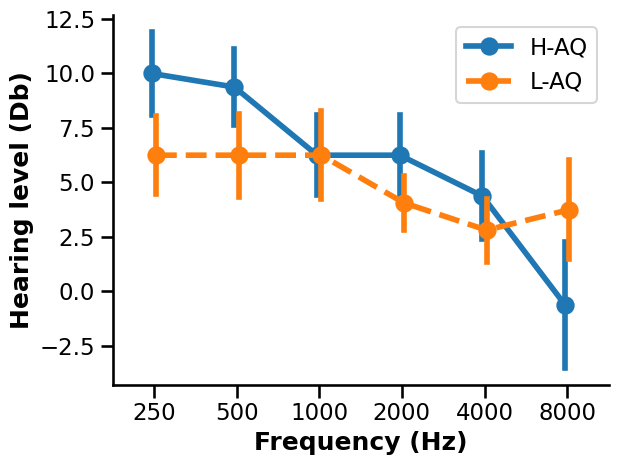

In [36]:
fig = sns.pointplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
# plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
# plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000'])
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})
fig.set_ylabel("Hearing level (Db)", fontdict={"weight": "bold"})
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

In [37]:
pg.normality(data=df_pointplots_hl, dv="Db", group="Freq")

,W,pval,normal
Freq,,,
HL_250,0.907258,0.030768,False
HL_500,0.926514,0.081491,True
HL_1000,0.902279,0.024063,False
HL_2000,0.913749,0.042565,False
HL_4000,0.902583,0.024425,False
HL_8000,0.925178,0.076094,True


In [38]:
pg.mixed_anova(
    data=df_pointplots_hl, dv="Db", between="Group", within="Freq", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,34.722222,1,22,34.722222,0.210094,0.651189,NaN,0.009459,NaN,NaN,NaN,NaN
1,Freq,548.784722,5,110,109.756944,4.802293,0.000522,0.00431,0.179175,0.646071,False,0.230408,0.00585
2,Interaction,232.986111,5,110,46.597222,2.038809,0.078700,NaN,0.084813,NaN,NaN,NaN,NaN


In [39]:
hl_posthoc = pg.pairwise_tests(
    data=df_pointplots_hl,
    dv="Db",
    between="Group",
    within="Freq",
    subject="ID",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)

hl_posthoc

/Users/camilamaura/Coding projects/GIFTED-DFI/.venv/lib/python3.12/site-packages/pingouin/pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)


,Contrast,Freq,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Freq,-,HL_1000,HL_2000,True,True,1.070743,23.000000,two-sided,0.295393,1.000000,bonferroni,0.358,0.237358
1,Freq,-,HL_1000,HL_250,True,True,-1.297277,23.000000,two-sided,0.207398,1.000000,bonferroni,0.452,-0.180238
2,Freq,-,HL_1000,HL_4000,True,True,2.118971,23.000000,two-sided,0.045105,0.676568,bonferroni,1.411,0.454324
3,Freq,-,HL_1000,HL_500,True,True,-0.925705,23.000000,two-sided,0.364211,1.000000,bonferroni,0.316,-0.148564
4,Freq,-,HL_1000,HL_8000,True,True,2.134146,23.000000,two-sided,0.043715,0.655724,bonferroni,1.446,0.493331
5,Freq,-,HL_2000,HL_250,True,True,-2.183878,23.000000,two-sided,0.039427,0.591405,bonferroni,1.57,-0.455820
6,Freq,-,HL_2000,HL_4000,True,True,1.319805,23.000000,two-sided,0.199887,1.000000,bonferroni,0.464,0.273558
7,Freq,-,HL_2000,HL_500,True,True,-2.220039,23.000000,two-sided,0.036552,0.548283,bonferroni,1.668,-0.414555
8,Freq,-,HL_2000,HL_8000,True,True,1.424574,23.000000,two-sided,0.167709,1.000000,bonferroni,0.524,0.348079
9,Freq,-,HL_250,HL_4000,True,True,3.293791,23.000000,two-sided,0.003177,0.047660,bonferroni,12.844,0.669193


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_66502/1611550533.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(freq_range)
/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_66502/1611550533.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(freq_range)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[['HL_1000', 'HL_2000', 1.0], ['HL_1000', 'HL_250', 1.0], ['HL_1000', 'HL_4000', 0.6765678215375057], ['HL_1000', 'HL_500', 1.0], ['HL_1000', 'HL_8000', 0.6557240887125142], ['HL_2000', 'HL_250', 0.5914053514792532], ['HL_2000', 'HL_4000', 1.0], ['HL_2000', 'HL_500', 0.5482828554786382], ['HL_2000', 'HL_8000', 1.0], ['HL_250', 'HL_4000', 0.04766014613812417], ['HL_250', 'HL_500', 1.0], ['HL_250', 'HL_8000', 0.14344144130970157], ['HL_4000', 'HL_500', 0.07539368190164777], ['HL_4000', 'HL_8000', 1.0], ['HL_500', 'HL_8000', 0.17855684023026902]]


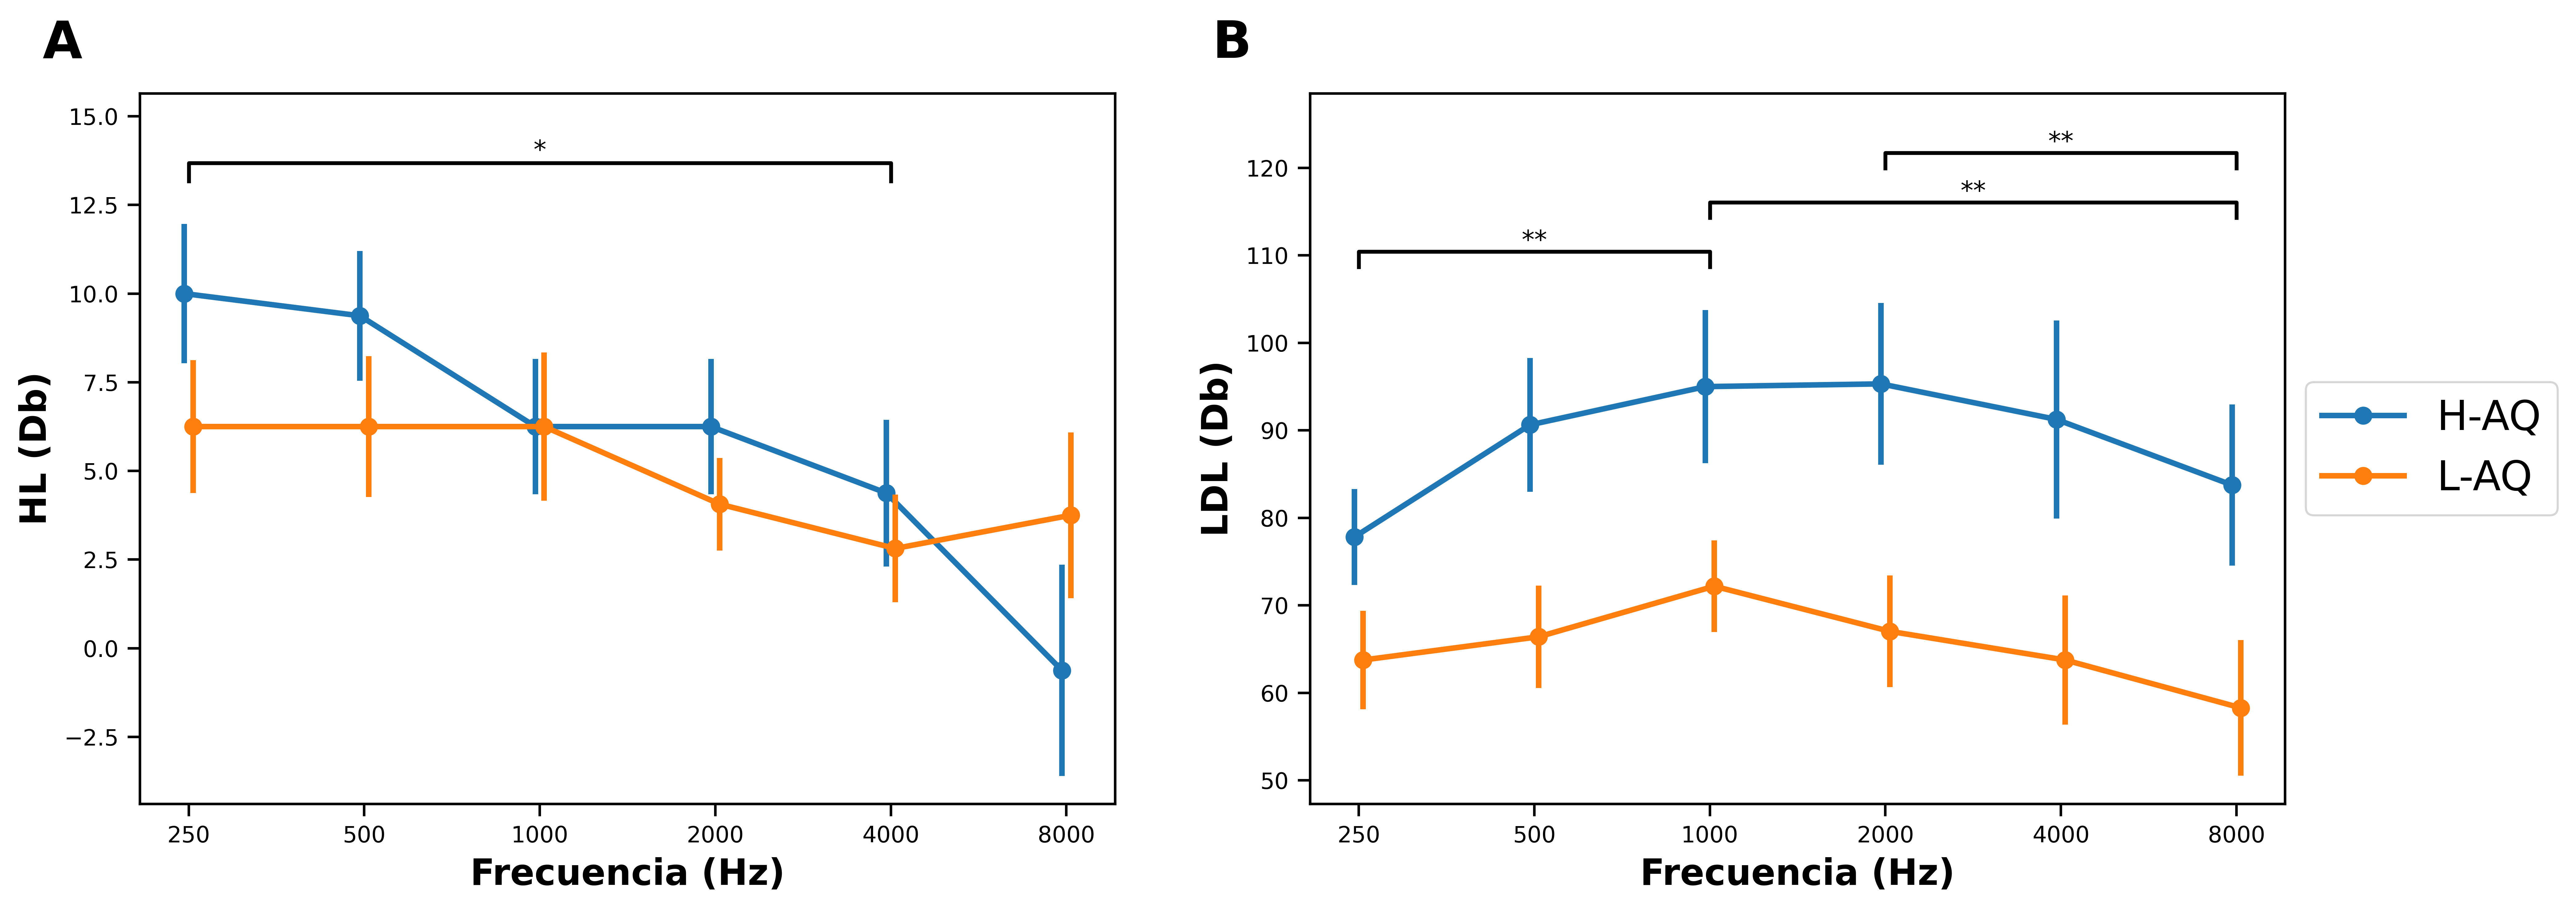

In [47]:
import matplotlib.pyplot as plt
import string
from matplotlib import rc
import seaborn as sns

sns.set_context("paper")

rc("text", usetex=False)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=600)
freq_range = [250, 500, 1000, 2000, 4000, 8000]

ax1 = plt.subplot(121)

ax1 = sns.pointplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=True,
    errorbar="se",
    legend=False,
)

# Draw stars
hl_pvalues = hl_posthoc[["Contrast", "Freq", "A", "B", "p-corr"]]
hl_pvalues_freq = hl_pvalues.query("Freq == '-' & Contrast == 'Freq'").drop(
    columns=["Freq", "Contrast"]
)
annotations = hl_pvalues_freq.to_dict(orient="split", index=False)["data"]
print(annotations)
starbars.draw_annotation(annotations, ns_show=False, ax=ax1)

ax1.set_xticklabels(freq_range)
# ax1.set_ylabel(
#    "Hearing Level (Db)", fontdict={"weight": "bold", "size": 14}
# )
# ax1.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold", "size": 14})

ax1.set_ylabel("HL (Db)", fontdict={"weight": "bold", "size": 14})
ax1.set_xlabel("Frecuencia (Hz)", fontdict={"weight": "bold", "size": 14})

ax1.text(
    -0.1,
    1.05,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

ax2 = plt.subplot(122)

ax2 = sns.pointplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=True,
    errorbar="se",
)

# Draw stars
ldl_pvalues = ldl_posthoc[["Contrast", "Freq", "A", "B", "p-corr"]]
ldl_pvalues_freq = ldl_pvalues.query("Freq == '-' & Contrast == 'Freq'").drop(
    columns=["Freq", "Contrast"]
)
annotations = ldl_pvalues_freq.to_dict(orient="split", index=False)["data"]
starbars.draw_annotation(annotations, ns_show=False, ax=ax2)

ax2.set_xticklabels(freq_range)
# ax2.set_ylabel(
#    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "size": 14}
# )
# ax2.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold", "size": 14})

ax2.set_ylabel("LDL (Db)", fontdict={"weight": "bold", "size": 14})
ax2.set_xlabel("Frecuencia (Hz)", fontdict={"weight": "bold", "size": 14})

ax2.text(
    -0.1,
    1.05,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

# Remove legend title
handles, labels = ax2.get_legend_handles_labels()
leg = ax2.legend(
    fontsize=16,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    handles=handles[2:],
    labels=labels[2:],
)

fig.savefig("drafts/FIG2.eps", bbox_inches="tight", format="eps")

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_66502/1713058797.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(freq_range)
/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_66502/1713058797.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(freq_range)


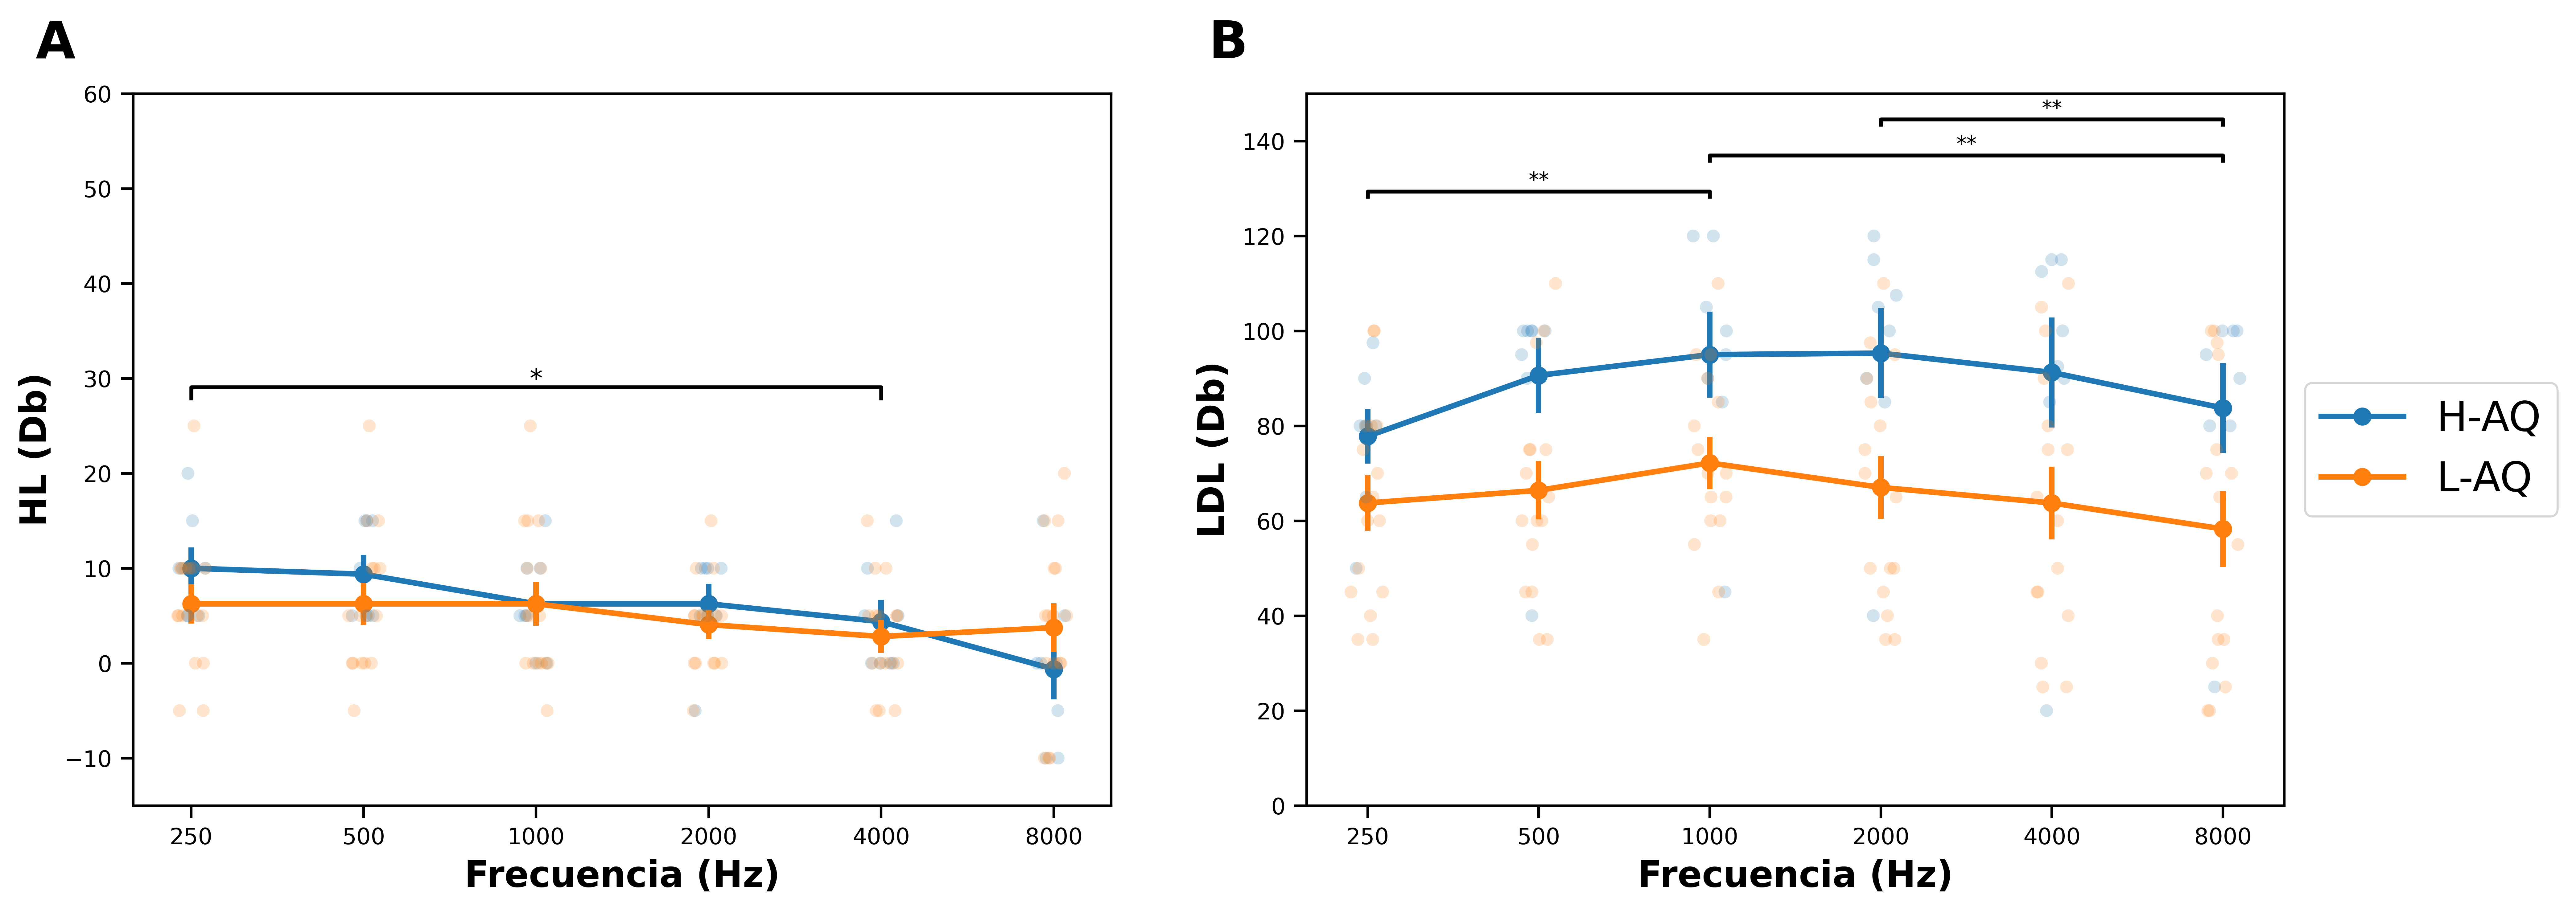

In [41]:
import matplotlib.pyplot as plt
import string
from matplotlib import rc

sns.set_context("paper")

rc("text", usetex=False)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=600)
freq_range = [250, 500, 1000, 2000, 4000, 8000]

ax1 = plt.subplot(121)

ax1 = sns.stripplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=False,
    legend=False,
    alpha=0.20,
)

ax1 = sns.pointplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    errorbar="se",
    legend=False,
    dodge=False,
)

# Draw stars
hl_pvalues = hl_posthoc[["Contrast", "Freq", "A", "B", "p-corr"]]
hl_pvalues_freq = hl_pvalues.query("Freq == '-' & Contrast == 'Freq'").drop(
    columns=["Freq", "Contrast"]
)
annotations = hl_pvalues_freq.to_dict(orient="split", index=False)["data"]
starbars.draw_annotation(annotations, ns_show=False, ax=ax1)

ax1.set_xticklabels(freq_range)
# ax1.set_ylabel(
#    "Hearing Level (Db)", fontdict={"weight": "bold", "size": 14}
# )
# ax1.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold", "size": 14})

ax1.set_ylabel("HL (Db)", fontdict={"weight": "bold", "size": 14})
ax1.set_xlabel("Frecuencia (Hz)", fontdict={"weight": "bold", "size": 14})

ax1.text(
    -0.1,
    1.05,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)
ax1.set_ylim(-15, 60)
# ax1.invert_yaxis()

ax2 = plt.subplot(122)

ax2 = sns.stripplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=False,
    alpha=0.20,
)

ax2 = sns.pointplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=False,
    errorbar="se",
)

# Draw stars
ldl_pvalues = ldl_posthoc[["Contrast", "Freq", "A", "B", "p-corr"]]
ldl_pvalues_freq = ldl_pvalues.query("Freq == '-' & Contrast == 'Freq'").drop(
    columns=["Freq", "Contrast"]
)
annotations = ldl_pvalues_freq.to_dict(orient="split", index=False)["data"]
starbars.draw_annotation(
    annotations, ns_show=False, ax=ax2, fontsize=8, tip_length=0.01
)

ax2.set_xticklabels(freq_range)
# ax2.set_ylabel(
#    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "size": 14}
# )
# ax2.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold", "size": 14})

ax2.set_ylabel("LDL (Db)", fontdict={"weight": "bold", "size": 14})
ax2.set_xlabel("Frecuencia (Hz)", fontdict={"weight": "bold", "size": 14})

ax2.text(
    -0.1,
    1.05,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

ax2.set_ylim(0, 150)
# ax2.invert_yaxis()

# Remove legend title
handles, labels = ax2.get_legend_handles_labels()
leg = ax2.legend(
    fontsize=16,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    handles=handles[2:],
    labels=labels[2:],
)

fig.savefig("drafts/FIG2.pdf", bbox_inches="tight", format="pdf")

## DFI Plot

### Preprocessing

In [42]:
df_sigmoid_fitted = pd.read_pickle("data/df_group_sigmoid_aq")

soas = [
    34.0,
    51.0,
    68.0,
    85.0,
    102.0,
    119.0,
    136.0,
    153.0,
    170.0,
    187.0,
    204.0,
    221.0,
    238.0,
    255.0,
    272.0,
]  # inter beep delay in experiment

In [43]:
df_sigmoid_fitted

,AQ_MC,a,b,TWI,slope,illusion_count
0,False,15.915476,50.286726,148.750372,-18.100215,60.333333
1,True,5.669415,26.757840,150.153521,-17.239902,28.125000


In [44]:
# Generate the data for the plotsusing the fitted parameters
x = np.linspace(soas[0], soas[-1], 100)

index_of_control_group = 0
control = df_sigmoid_fitted.iloc[index_of_control_group].tolist()[1:-1]

index_of_HA_group = 1
ha = df_sigmoid_fitted.iloc[index_of_HA_group].tolist()[1:-1]

y_control = sig(x, *control)
y_ha = sig(x, *ha)

# Create a pandas DataFrame
df_control = pd.DataFrame({"x": x, "y": y_control})
df_ha = pd.DataFrame({"x": x, "y": y_ha})

### Plot

In [45]:
asd_data = (
    df_sigmoid.query("AQ_MC == 1").groupby("SOA")["Illusion_count"].mean().values * 10
)
asd_data_sem = (
    df_sigmoid.query("AQ_MC == 1").groupby("SOA")["Illusion_count"].sem().values * 10
)

td_data = (
    df_sigmoid.query("AQ_MC == 0").groupby("SOA")["Illusion_count"].mean().values * 10
)
td_data_sem = (
    df_sigmoid.query("AQ_MC == 0").groupby("SOA")["Illusion_count"].sem().values * 10
)

KeyError: 'SOA'

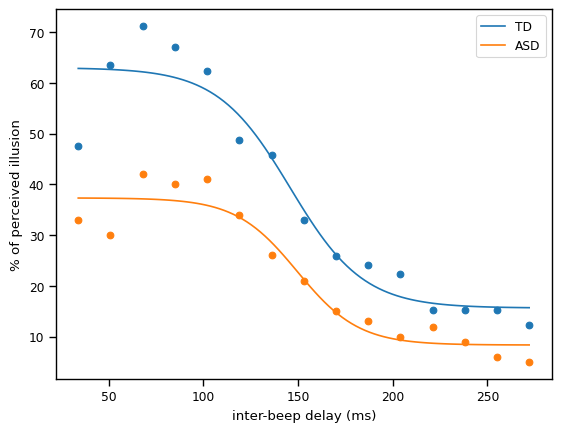

In [46]:
# Plot the sigmoid function
fig = sns.lineplot(data=df_control, x="x", y="y", label="TD")
fig = plt.scatter(soas, td_data)
# fig = plt.errorbar(soas, td_data, td_data_sem, fmt="none")

fig = sns.lineplot(data=df_ha, x="x", y="y", label="ASD")
fig = plt.scatter(soas, asd_data)
# fig = plt.errorbar(soas, asd_data, asd_data_sem, fmt="none")

plt.xlabel("inter-beep delay (ms)")
plt.ylabel("% of perceived illusion")
plt.legend()
plt.show()

In [47]:
pg.mixed_anova(
    data=df_sigmoid,
    dv="Illusion_count",
    within="SOA",
    between="AQ_MC",
    subject="Participant",
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,AQ_MC,227.879753,1,25,227.879753,3.727082,6.495415e-02,NaN,0.129741,NaN,NaN,NaN,NaN
1,SOA,1249.219753,14,350,89.229982,33.170127,1.039713e-55,1.188901e-17,0.570226,0.290018,False,0.000005,2.738634e-14
2,Interaction,69.388874,14,350,4.956348,1.842460,3.162087e-02,NaN,0.068640,NaN,NaN,NaN,NaN


In [48]:
dfi_posthoc = pg.pairwise_tests(
    data=df_sigmoid,
    dv="Illusion_count",
    between="AQ_MC",
    within="SOA",
    subject="Participant",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)

dfi_posthoc

,Contrast,SOA,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,SOA,-,2.0,3.0,True,True,-2.655343,26.000000,two-sided,0.013349,1.000000,bonferroni,3.658,-0.278602
1,SOA,-,2.0,4.0,True,True,-4.248839,26.000000,two-sided,0.000244,0.025589,bonferroni,119.16,-0.558212
2,SOA,-,2.0,5.0,True,True,-3.696786,26.000000,two-sided,0.001026,0.107688,bonferroni,33.31,-0.477622
3,SOA,-,2.0,6.0,True,True,-2.210225,26.000000,two-sided,0.036095,1.000000,bonferroni,1.615,-0.388247
4,SOA,-,2.0,7.0,True,True,-0.204782,26.000000,two-sided,0.839337,1.000000,bonferroni,0.208,-0.034716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,SOA * AQ_MC,12.0,False,True,False,True,1.564415,24.512484,two-sided,0.130540,1.000000,bonferroni,0.884,0.561361
117,SOA * AQ_MC,13.0,False,True,False,True,0.398252,14.363955,two-sided,0.696301,1.000000,bonferroni,0.389,0.173774
118,SOA * AQ_MC,14.0,False,True,False,True,1.086057,19.151600,two-sided,0.290935,1.000000,bonferroni,0.564,0.431731
119,SOA * AQ_MC,15.0,False,True,False,True,1.717335,24.871261,two-sided,0.098347,1.000000,bonferroni,1.052,0.606874


In [49]:
sup_table_1 = dfi_posthoc.query("Contrast == 'SOA * AQ_MC'")[
    ["Contrast", "SOA", "A", "B", "T", "dof", "p-unc", "cohen"]
]
pg.print_table(sup_table_1, tablefmt="latex")


POST HOC TESTS

\begin{tabular}{lrllrrrr}
\hline
 Contrast    &    SOA & A     & B    &     T &    dof &   p-unc &   cohen \\
\hline
 SOA * AQ\_MC &  2.000 & False & True & 1.117 & 15.868 &   0.281 &   0.472 \\
 SOA * AQ\_MC &  3.000 & False & True & 2.772 & 15.715 &   0.014 &   1.174 \\
 SOA * AQ\_MC &  4.000 & False & True & 2.103 & 13.426 &   0.055 &   0.939 \\
 SOA * AQ\_MC &  5.000 & False & True & 2.204 & 14.546 &   0.044 &   0.958 \\
 SOA * AQ\_MC &  6.000 & False & True & 1.549 & 12.928 &   0.146 &   0.701 \\
 SOA * AQ\_MC &  7.000 & False & True & 1.141 & 18.836 &   0.268 &   0.456 \\
 SOA * AQ\_MC &  8.000 & False & True & 1.614 & 22.631 &   0.120 &   0.604 \\
 SOA * AQ\_MC &  9.000 & False & True & 1.038 & 17.337 &   0.314 &   0.426 \\
 SOA * AQ\_MC & 10.000 & False & True & 1.376 & 24.830 &   0.181 &   0.487 \\
 SOA * AQ\_MC & 11.000 & False & True & 1.274 & 21.441 &   0.216 &   0.487 \\
 SOA * AQ\_MC & 12.000 & False & True & 1.564 & 24.512 &   0.131 &   0.561 \\
 SOA * A

In [50]:
dfi_posthoc.loc[dfi_posthoc["p-unc"] < 0.05].query("Contrast == 'SOA'")

,Contrast,SOA,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,SOA,-,2.0,3.0,True,True,-2.655343,26.0,two-sided,0.013349,1.000000,bonferroni,3.658,-0.278602
1,SOA,-,2.0,4.0,True,True,-4.248839,26.0,two-sided,0.000244,0.025589,bonferroni,119.16,-0.558212
2,SOA,-,2.0,5.0,True,True,-3.696786,26.0,two-sided,0.001026,0.107688,bonferroni,33.31,-0.477622
3,SOA,-,2.0,6.0,True,True,-2.210225,26.0,two-sided,0.036095,1.000000,bonferroni,1.615,-0.388247
6,SOA,-,2.0,9.0,True,True,2.382239,26.0,two-sided,0.024809,1.000000,bonferroni,2.19,0.460708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,SOA,-,11.0,14.0,True,True,2.172862,26.0,two-sided,0.039091,1.000000,bonferroni,1.515,0.364675
93,SOA,-,11.0,15.0,True,True,2.991691,26.0,two-sided,0.006005,0.630560,bonferroni,7.187,0.413338
94,SOA,-,11.0,16.0,True,True,3.261722,26.0,two-sided,0.003090,0.324480,bonferroni,12.723,0.549862
97,SOA,-,12.0,15.0,True,True,2.126438,26.0,two-sided,0.043123,1.000000,bonferroni,1.4,0.306217


/tmp/ipykernel_26128/1492041639.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(["L-AQ", "H-AQ"])
/tmp/ipykernel_26128/1492041639.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(["L-AQ", "H-AQ"])


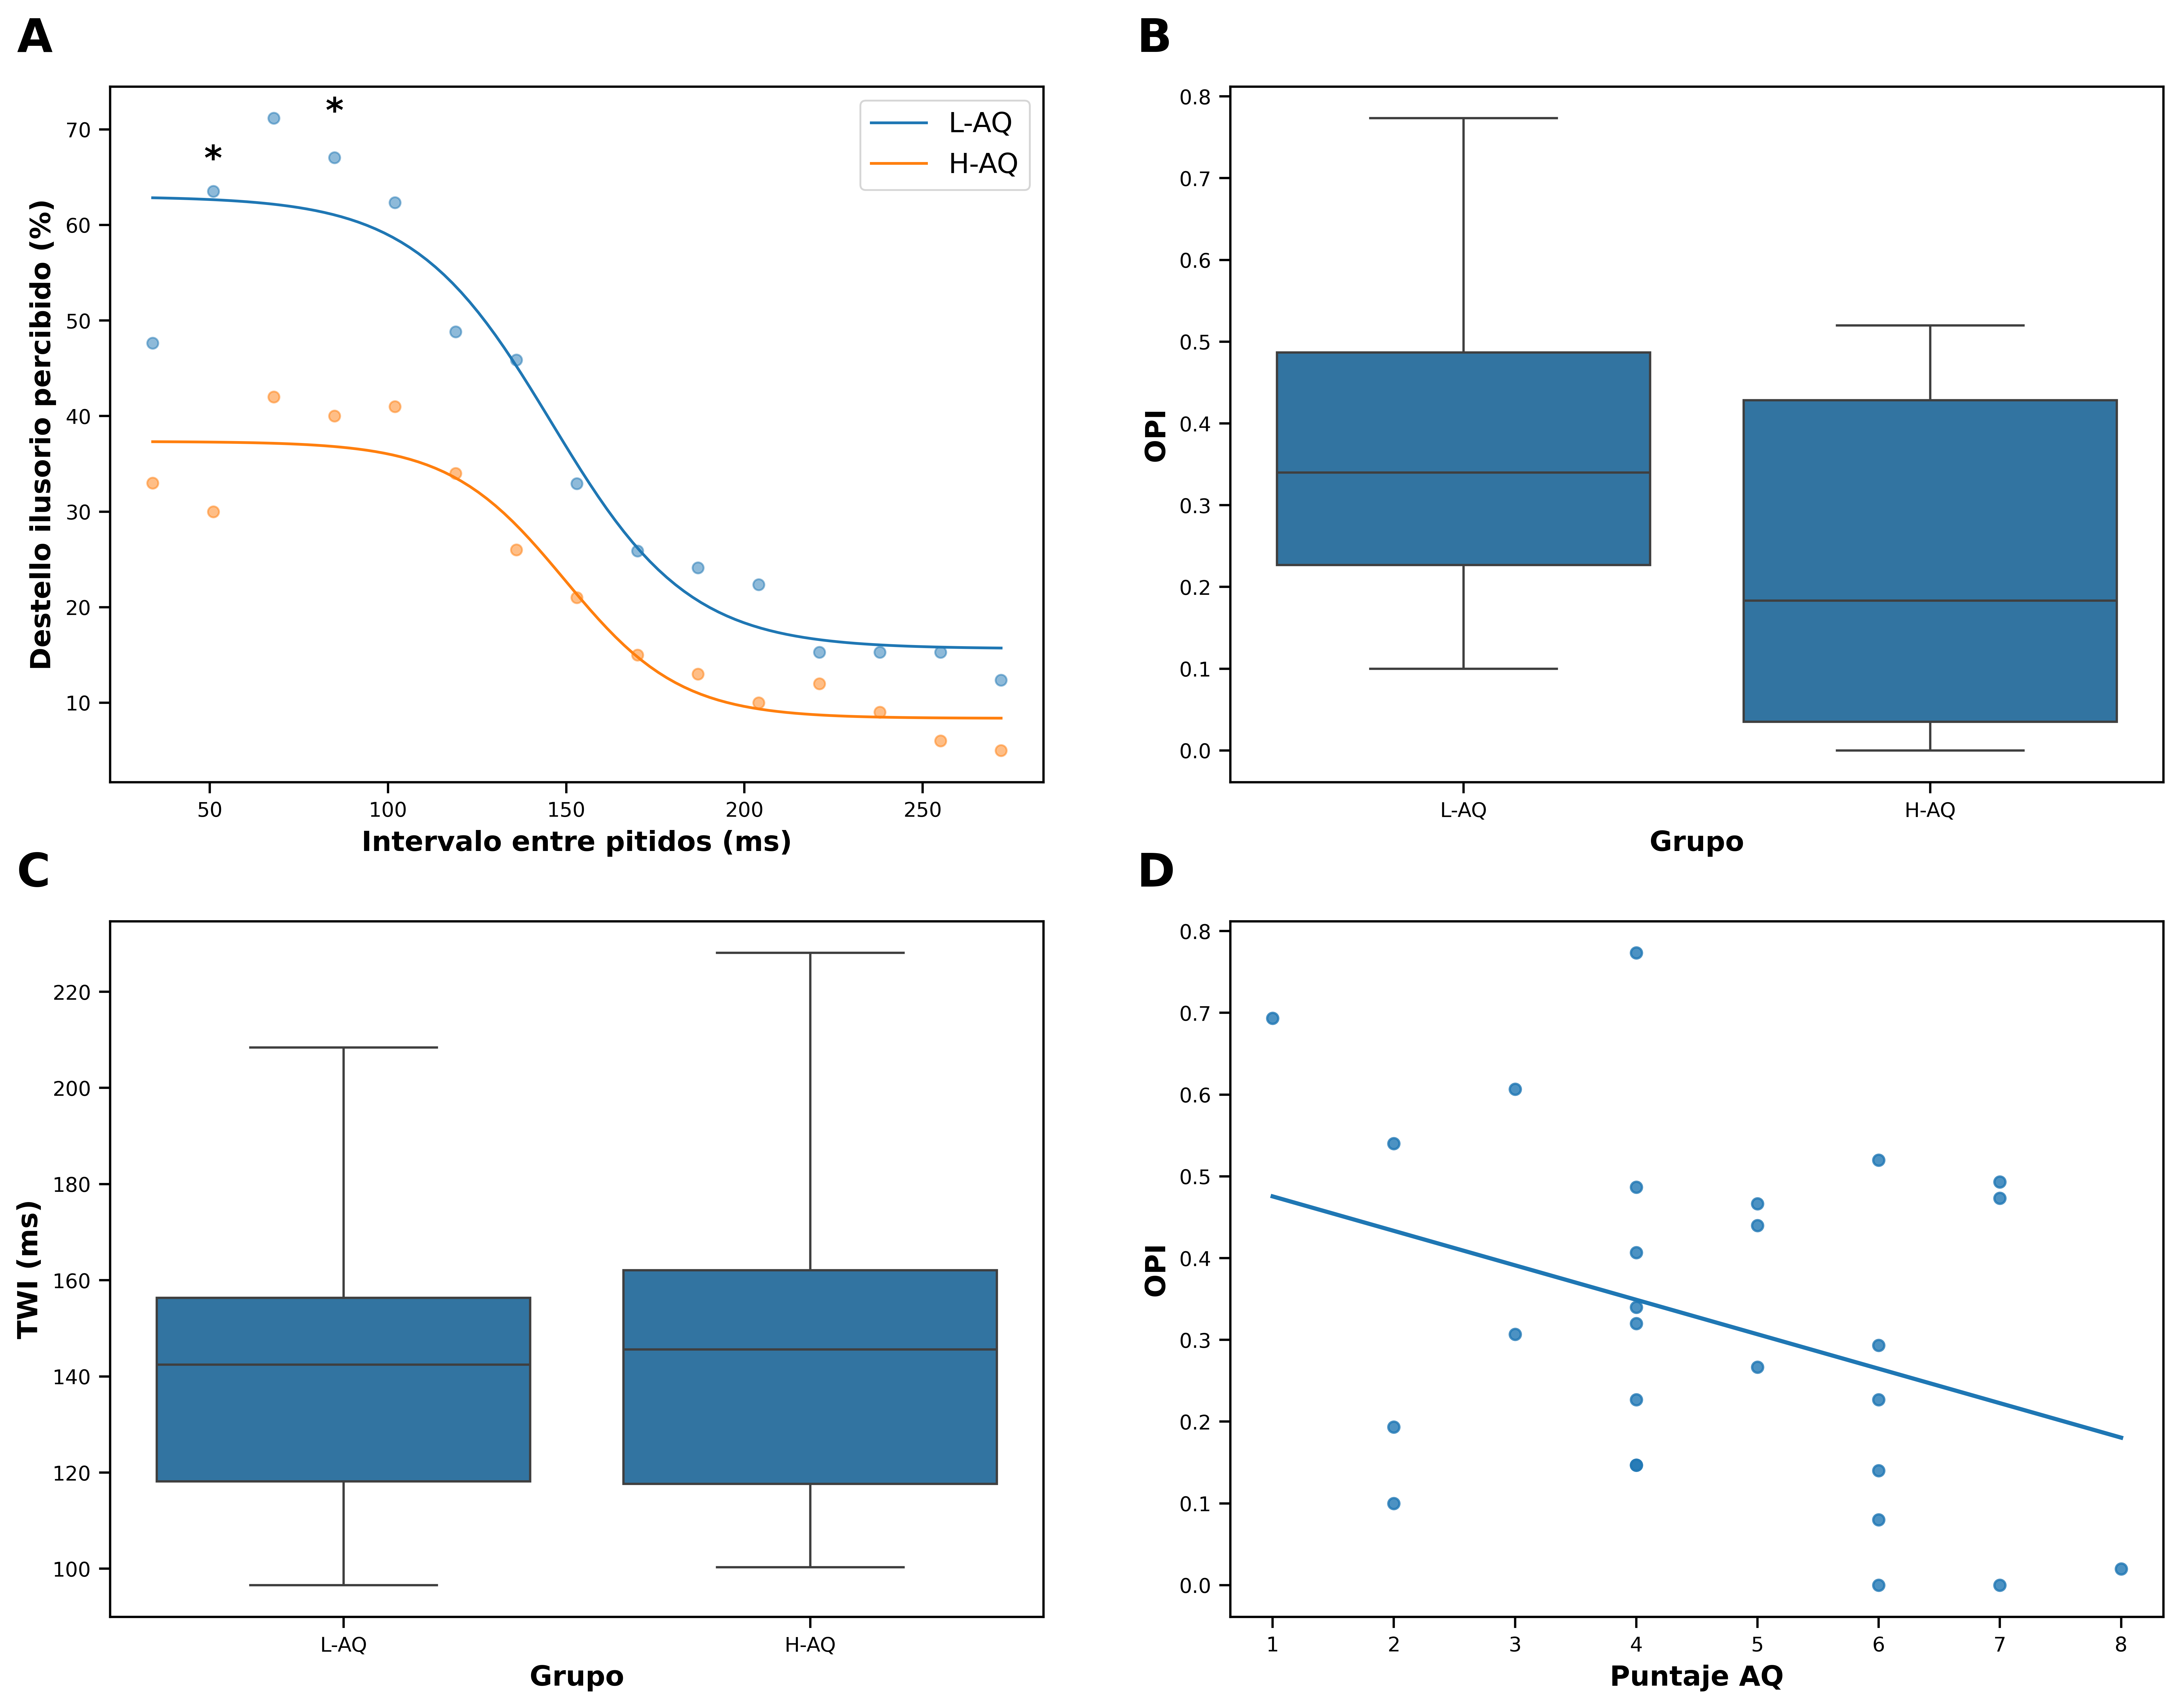

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), dpi=600)

ax1 = plt.subplot(221)
ax1 = sns.lineplot(data=df_control, x="x", y="y", label="L-AQ")
# ax1.set_ylabel(
#    "Perceived second illusory flash (%)", fontdict={"weight": "bold", "size": 12}
# )
# ax1.set_xlabel("Inter-beep delay (ms)", fontdict={"weight": "bold", "size": 12})
#
ax1.set_ylabel(
    "Destello ilusorio percibido (%)", fontdict={"weight": "bold", "size": 12}
)
ax1.set_xlabel("Intervalo entre pitidos (ms)", fontdict={"weight": "bold", "size": 12})

ax1.text(
    -0.1,
    1.05,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)
ax1 = plt.scatter(soas, td_data, alpha=0.5)
ax1 = sns.lineplot(data=df_ha, x="x", y="y", label="H-AQ")
ax1.legend(fontsize=12)
ax1 = plt.scatter(soas, asd_data, alpha=0.5)
ax1 = plt.text(51, 65, "*", ha="center", va="bottom", size=15, weight="bold")
ax1 = plt.text(85, 70, "*", ha="center", va="bottom", size=15, weight="bold")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(data=df, x="AQ_MC", y="OPI")
ax2.set_xticklabels(["L-AQ", "H-AQ"])
# ax2.set_ylabel(
#    "Overall proneness to the illusion", fontdict={"weight": "bold", "size": 12}
# )
# ax2.set_xlabel("Group", fontdict={"weight": "bold", "size": 12})

ax2.set_ylabel("OPI", fontdict={"weight": "bold", "size": 12})
ax2.set_xlabel("Grupo", fontdict={"weight": "bold", "size": 12})

ax2.text(
    -0.1,
    1.05,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

ax3 = plt.subplot(223)
ax3 = sns.boxplot(data=df, x="AQ_MC", y="TWI")
ax3.set_xticklabels(["L-AQ", "H-AQ"])
ax3.set_ylabel("TWI (ms)", fontdict={"weight": "bold", "size": 12})
# ax3.set_xlabel("Group", fontdict={"weight": "bold", "size": 12})
ax3.set_xlabel("Grupo", fontdict={"weight": "bold", "size": 12})
ax3.text(
    -0.1,
    1.05,
    string.ascii_uppercase[2],
    transform=ax3.transAxes,
    size=20,
    weight="bold",
)

ax4 = plt.subplot(224)
ax4 = sns.regplot(data=df, x="AQ_TOTAL", y="OPI", ci=None)
# ax4.set_ylabel(
#    "Overall proneness to the illusion", fontdict={"weight": "bold", "size": 12}
# )
# ax4.set_xlabel("AQ Score", fontdict={"weight": "bold", "size": 12})

ax4.set_ylabel("OPI", fontdict={"weight": "bold", "size": 12})
ax4.set_xlabel("Puntaje AQ", fontdict={"weight": "bold", "size": 12})

ax4.text(
    -0.1,
    1.05,
    string.ascii_uppercase[3],
    transform=ax4.transAxes,
    size=20,
    weight="bold",
)

fig.savefig("drafts/FIG3.pdf", bbox_inches="tight", format="pdf")

## EXTRA
### Correlations between audiometry measurements and double flash illusion
- Average LDL across frequenciess x TWI (plot and correlation)
- Average LDL across frequenciess x OPI (plot and correlation)
- Average HL across frequenciess x TWI (plot and correlation)
- Average HL across frequencies x OPI (plot and correlation)

In [52]:
pg.pairwise_corr(
    data=df, columns=[["TWI", "OPI"], ["Avg_LDL", "Avg_HL"]], method="pearson"
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,Avg_LDL,pearson,two-sided,23,-0.037221,"[-0.44, 0.38]",0.866103,0.262,0.052648
1,TWI,Avg_HL,pearson,two-sided,23,0.045134,"[-0.37, 0.45]",0.837974,0.264,0.054208
2,OPI,Avg_LDL,pearson,two-sided,25,-0.246439,"[-0.58, 0.16]",0.235016,0.484,0.224119
3,OPI,Avg_HL,pearson,two-sided,25,0.038794,"[-0.36, 0.43]",0.853930,0.252,0.053329


In [53]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["TWI", "OPI"],
        ["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
    ],
    method="pearson",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,HL_250,pearson,two-sided,23,0.171779,"[-0.26, 0.55]",0.433195,0.345,0.123453
1,TWI,HL_500,pearson,two-sided,23,0.237852,"[-0.19, 0.59]",0.274453,0.454,0.196793
2,TWI,HL_1000,pearson,two-sided,23,0.202923,"[-0.23, 0.57]",0.353083,0.388,0.154580
3,TWI,HL_2000,pearson,two-sided,23,-0.183029,"[-0.55, 0.25]",0.403200,0.359,0.134003
4,TWI,HL_4000,pearson,two-sided,23,-0.068007,"[-0.47, 0.35]",0.757839,0.27,0.060446
5,TWI,HL_8000,pearson,two-sided,23,-0.147602,"[-0.53, 0.28]",0.501523,0.32,0.103362
6,OPI,HL_250,pearson,two-sided,25,0.025453,"[-0.37, 0.42]",0.903873,0.25,0.051084
7,OPI,HL_500,pearson,two-sided,25,0.019102,"[-0.38, 0.41]",0.927790,0.249,0.050345
8,OPI,HL_1000,pearson,two-sided,25,0.117138,"[-0.29, 0.49]",0.577098,0.288,0.086217
9,OPI,HL_2000,pearson,two-sided,25,-0.274092,"[-0.6, 0.14]",0.184888,0.571,0.268400


In [54]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["TWI", "OPI"],
        ["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
    ],
    method="pearson",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,LDL_250,pearson,two-sided,23,-0.150174,"[-0.53, 0.28]",0.494012,0.322,0.105335
1,TWI,LDL_500,pearson,two-sided,23,-0.151522,"[-0.53, 0.28]",0.490100,0.324,0.106384
2,TWI,LDL_1000,pearson,two-sided,23,0.076453,"[-0.35, 0.47]",0.728804,0.274,0.063409
3,TWI,LDL_2000,pearson,two-sided,23,0.014339,"[-0.4, 0.42]",0.948226,0.259,0.049834
4,TWI,LDL_4000,pearson,two-sided,23,0.006252,"[-0.41, 0.42]",0.977412,0.259,0.049438
5,TWI,LDL_8000,pearson,two-sided,23,-0.043353,"[-0.45, 0.38]",0.844288,0.263,0.053830
6,OPI,LDL_250,pearson,two-sided,25,-0.316694,"[-0.63, 0.09]",0.122972,0.766,0.346283
7,OPI,LDL_500,pearson,two-sided,25,-0.257756,"[-0.59, 0.15]",0.213519,0.517,0.241615
8,OPI,LDL_1000,pearson,two-sided,25,-0.149952,"[-0.51, 0.26]",0.474338,0.316,0.110735
9,OPI,LDL_2000,pearson,two-sided,25,-0.187108,"[-0.54, 0.22]",0.370472,0.363,0.146882


,n,r,CI95%,p-val,BF10,power
pearson,23,-0.037221,"[-0.44, 0.38]",0.866103,0.262,0.052648


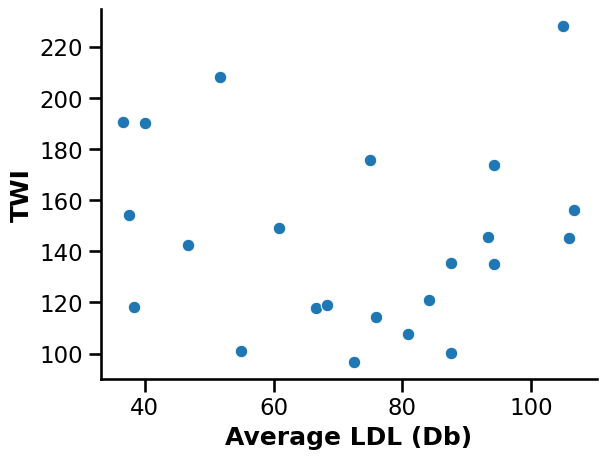

In [55]:
x = "Avg_LDL"
y = "TWI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("TWI", fontdict={"weight": "bold"})
plt.show()

,n,r,CI95%,p-val,BF10,power
pearson,25,-0.246439,"[-0.58, 0.16]",0.235016,0.484,0.224119


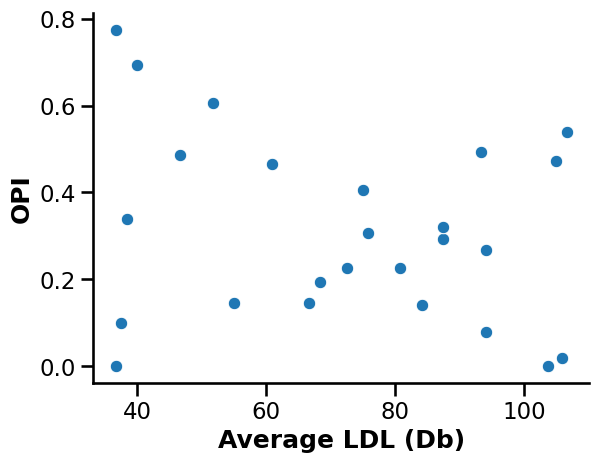

In [56]:
x = "Avg_LDL"
y = "OPI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
plt.show()